In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
# Import Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
#importing datasets
import pandas as pd
dataset = pd.read_csv("C:\\Users\\vichu\\Downloads\\top50.csv",encoding='latin-1')

In [4]:
#displaying first 5 rows in our data
dataset.head()

Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [6]:
#Preprocessing the data
dataset.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
dataset.head()

Unnamed: 0                       track_name    artist_name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0               117      55            76            -6         8       75   
1               105      81            79            -4         8       61   
2               190      80            40            -4        16       70   
3                93      65            64            -8         8       55   
4               150      65            58            -4        11       18   

   Length  Acousticness  Speechiness  Popularity  
0     191             4            3          79  
1     302             8            9          92  
2     186            12           46          85  
3     198            12           19          86  
4     175            45            7          94

In [9]:
#Removing unwanted columns
dataset=dataset.drop(columns= ["Unnamed: 0"])

In [10]:
#statistics of our data
dataset.describe()

beats_per_minute     Energy  Danceability  Loudness(dB)   Liveness  \
count         50.000000  50.000000      50.00000     50.000000  50.000000   
mean         120.060000  64.060000      71.38000     -5.660000  14.660000   
std           30.898392  14.231913      11.92988      2.056448  11.118306   
min           85.000000  32.000000      29.00000    -11.000000   5.000000   
25%           96.000000  55.250000      67.00000     -6.750000   8.000000   
50%          104.500000  66.500000      73.50000     -6.000000  11.000000   
75%          137.500000  74.750000      79.75000     -4.000000  15.750000   
max          190.000000  88.000000      90.00000     -2.000000  58.000000   

         Valence      Length  Acousticness  Speechiness  Popularity  
count  50.000000   50.000000     50.000000    50.000000   50.000000  
mean   54.600000  200.960000     22.160000    12.480000   87.500000  
std    22.336024   39.143879     18.995553    11.161596    4.491489  
min    10.000000  115.000000      1.000000     3.000000   70.000000  
25%    38.250000  176.750000      8.250000     5.000000   86.000000  
50%    55.500000  198.000000     15.000000     7.000000   88.000000  
75%    69.500000  217.500000     33.750000    15.000000   90.750000  
max    95.000000  309.000000     75.000000    46.000000   95.000000

In [11]:
pd.set_option('precision', 2)
dataset.describe()

beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  \
count             50.00   50.00         50.00         50.00     50.00   
mean             120.06   64.06         71.38         -5.66     14.66   
std               30.90   14.23         11.93          2.06     11.12   
min               85.00   32.00         29.00        -11.00      5.00   
25%               96.00   55.25         67.00         -6.75      8.00   
50%              104.50   66.50         73.50         -6.00     11.00   
75%              137.50   74.75         79.75         -4.00     15.75   
max              190.00   88.00         90.00         -2.00     58.00   

       Valence  Length  Acousticness  Speechiness  Popularity  
count    50.00   50.00         50.00        50.00       50.00  
mean     54.60  200.96         22.16        12.48       87.50  
std      22.34   39.14         19.00        11.16        4.49  
min      10.00  115.00          1.00         3.00       70.00  
25%      38.25  176.75          8.25         5.00       86.00  
50%      55.50  198.00         15.00         7.00       88.00  
75%      69.50  217.50         33.75        15.00       90.75  
max      95.00  309.00         75.00        46.00       95.00

In [12]:
#checking for missing values
dataset.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [13]:
#knowing the datatypes
dataset.dtypes

track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [14]:
#checking and removing duplicate values
dataset=dataset.drop_duplicates(keep='first')
dataset

track_name       artist_name  \
0                                            Señorita      Shawn Mendes   
1                                               China          Anuel AA   
2                       boyfriend (with Social House)     Ariana Grande   
3                     Beautiful People (feat. Khalid)        Ed Sheeran   
4                         Goodbyes (Feat. Young Thug)       Post Malone   
5                   I Don't Care (with Justin Bieber)        Ed Sheeran   
6                                              Ransom         Lil Tecca   
7                                   How Do You Sleep?         Sam Smith   
8                               Old Town Road - Remix         Lil Nas X   
9                                             bad guy     Billie Eilish   
10                                           Callaita         Bad Bunny   
11              Loco Contigo (feat. J. Balvin & Tyga)          DJ Snake   
12                                  Someone You Loved     Lewis Capaldi   
13                                 Otro Trago - Remix              Sech   
14           Money In The Grave (Drake ft. Rick Ross)             Drake   
15                          No Guidance (feat. Drake)       Chris Brown   
16                                         LA CANCIÓN          J Balvin   
17      Sunflower - Spider-Man: Into the Spider-Verse       Post Malone   
18                                             Lalala               Y2K   
19                                        Truth Hurts             Lizzo   
20                                Piece Of Your Heart            MEDUZA   
21                                             Panini         Lil Nas X   
22                               No Me Conoce - Remix       Jhay Cortez   
23                                    Soltera - Remix             Lunay   
24                       bad guy (with Justin Bieber)     Billie Eilish   
25                                If I Can't Have You      Shawn Mendes   
26                                       Dance Monkey       Tones and I   
27                                           It's You         Ali Gatie   
28                                          Con Calma      Daddy Yankee   
29                                      QUE PRETENDES          J Balvin   
30                                           Takeaway  The Chainsmokers   
31                                            7 rings     Ariana Grande   
32                                  0.958333333333333            Maluma   
33          The London (feat. J. Cole & Travis Scott)        Young Thug   
34                                  Never Really Over        Katy Perry   
35  Summer Days (feat. Macklemore & Patrick Stump ...     Martin Garrix   
36                                         Otro Trago              Sech   
37                     Antisocial (with Travis Scott)        Ed Sheeran   
38                                             Sucker    Jonas Brothers   
39  fuck, i'm lonely (with Anne-Marie) - from 13 ...              Lauv   
40                                        Higher Love              Kygo   
41                              You Need To Calm Down      Taylor Swift   
42                                            Shallow         Lady Gaga   
43                                               Talk            Khalid   
44                                         Con Altura           ROSALÍA   
45                                    One Thing Right        Marshmello   
46                                          Te Robaré         Nicky Jam   
47                                            Happier        Marshmello   
48                                      Call You Mine  The Chainsmokers   
49      Cross Me (feat. Chance the Rapper & PnB Rock)        Ed Sheeran   

               Genre  beats_per_minute  Energy  Danceability  Loudness(dB)  \
0       canadian pop               117      55            76            -6   
1     reggaeton flow               105      81            79 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180118E1988>,
      dtype=object)

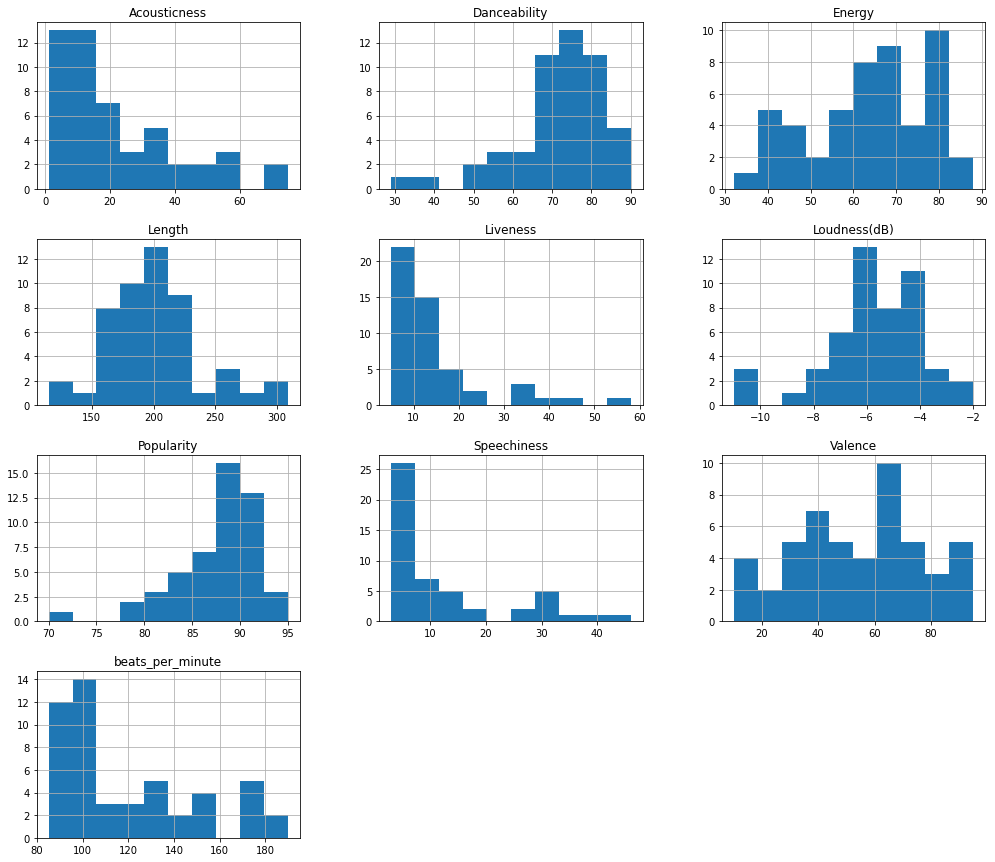

In [15]:
#knowing the data distributions 
from pylab import rcParams
rcParams['figure.figsize'] = 17,15
dataset.hist()

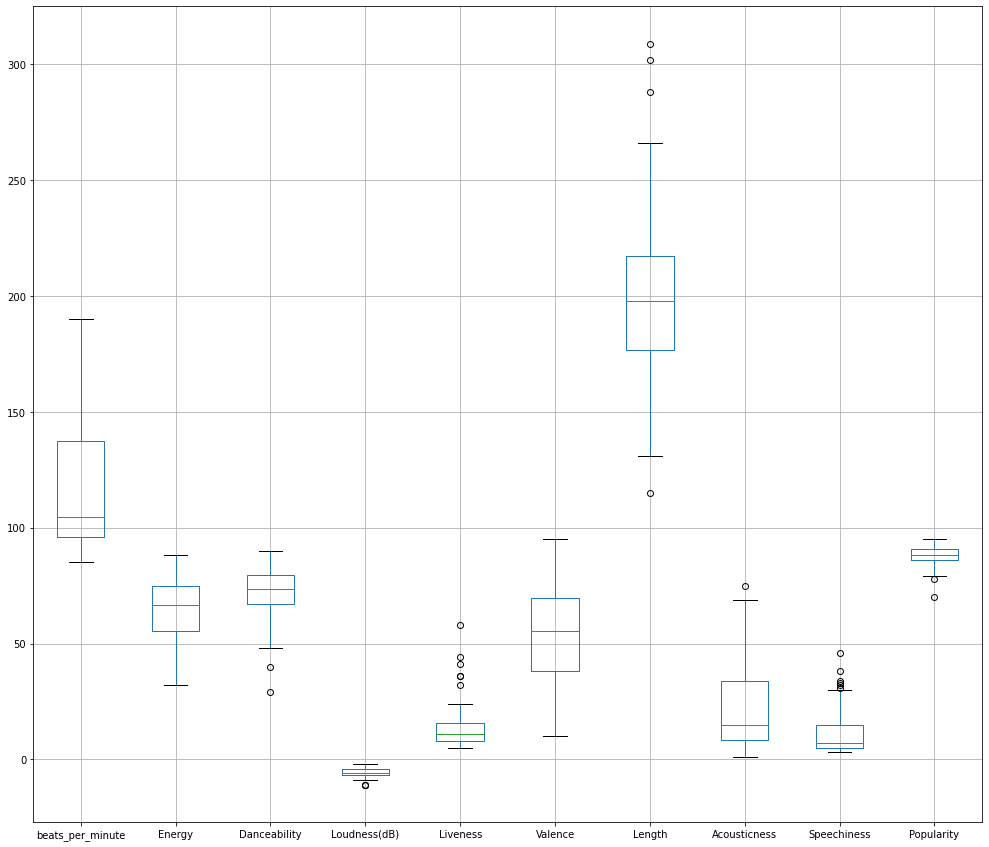

In [16]:
#boxplot
dataset.boxplot()

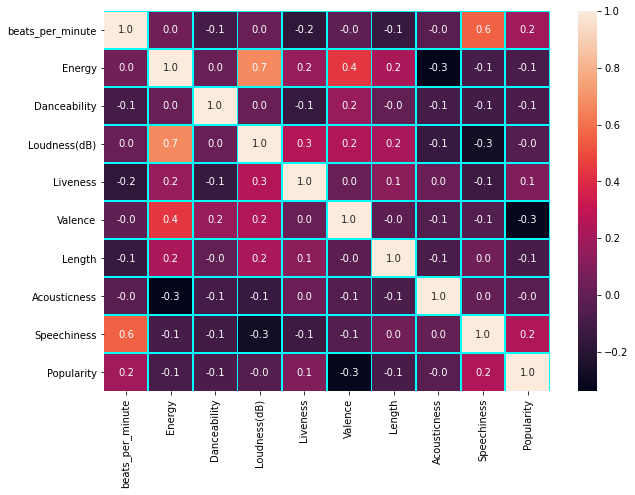

In [17]:
#FINDING CORRELATION
f,ax = plt.subplots(figsize = (10,7))
sns.heatmap(dataset.corr(), annot = True, linewidth = .8, fmt = '.1f', ax = ax, linecolor = 'cyan')
plt.show()

In [18]:
number_of_unique_artists = len(dataset['artist_name'].value_counts().to_list())
number_of_unique_genres = len(dataset['Genre'].value_counts().to_list())
print("Number Of Unique Artists: ",number_of_unique_artists,' | ',' Number Of Unique Genres: ',number_of_unique_genres)

Number Of Unique Artists:  38  |   Number Of Unique Genres:  21


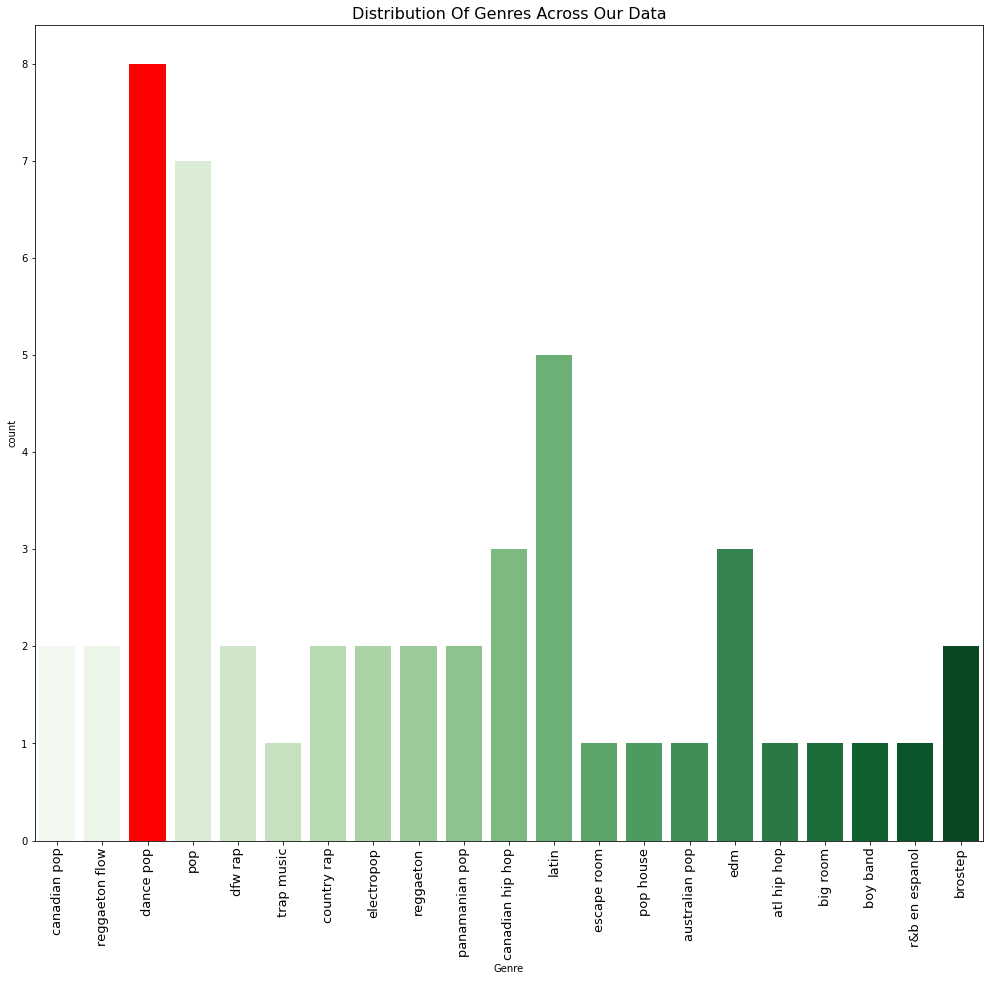

In [19]:
ax = sns.countplot(dataset['Genre'],palette='Greens')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16)
ax.patches[2].set_fc('r')
plt.show()

In [20]:
main_genres = ['rock','pop','blues','hip hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip hop'
            else:
                return word
    return sir

dataset['Main.Genre'] = dataset['Genre'].apply(check_genre)

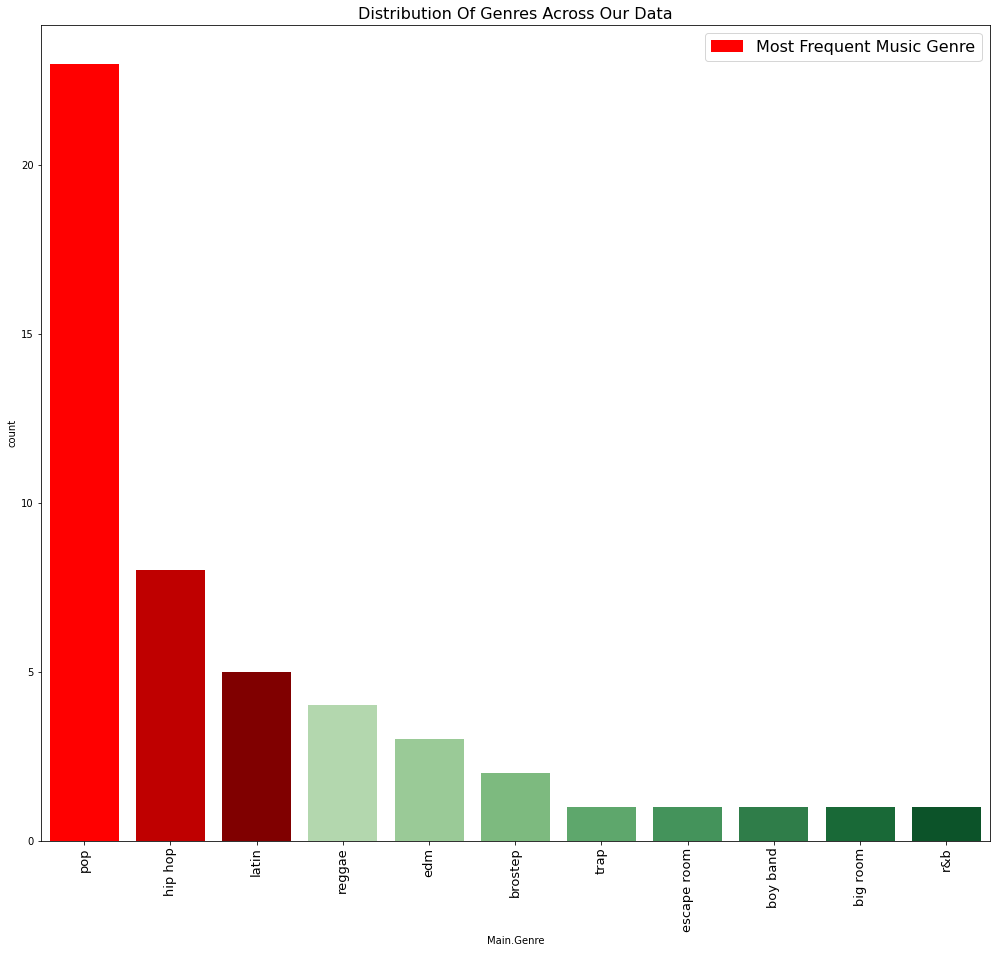

In [21]:
ax = sns.countplot(dataset['Main.Genre'],palette='Greens',order=dataset['Main.Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Distribution Of Genres Across Our Data',fontsize=16)
ax.patches[0].set_fc('r')
ax.patches[1].set_fc((0.75,0,0))
ax.patches[2].set_fc((0.50,0,0))
plt.legend({'Most Frequent Music Genre':0},prop={'size':'16'})
plt.show()


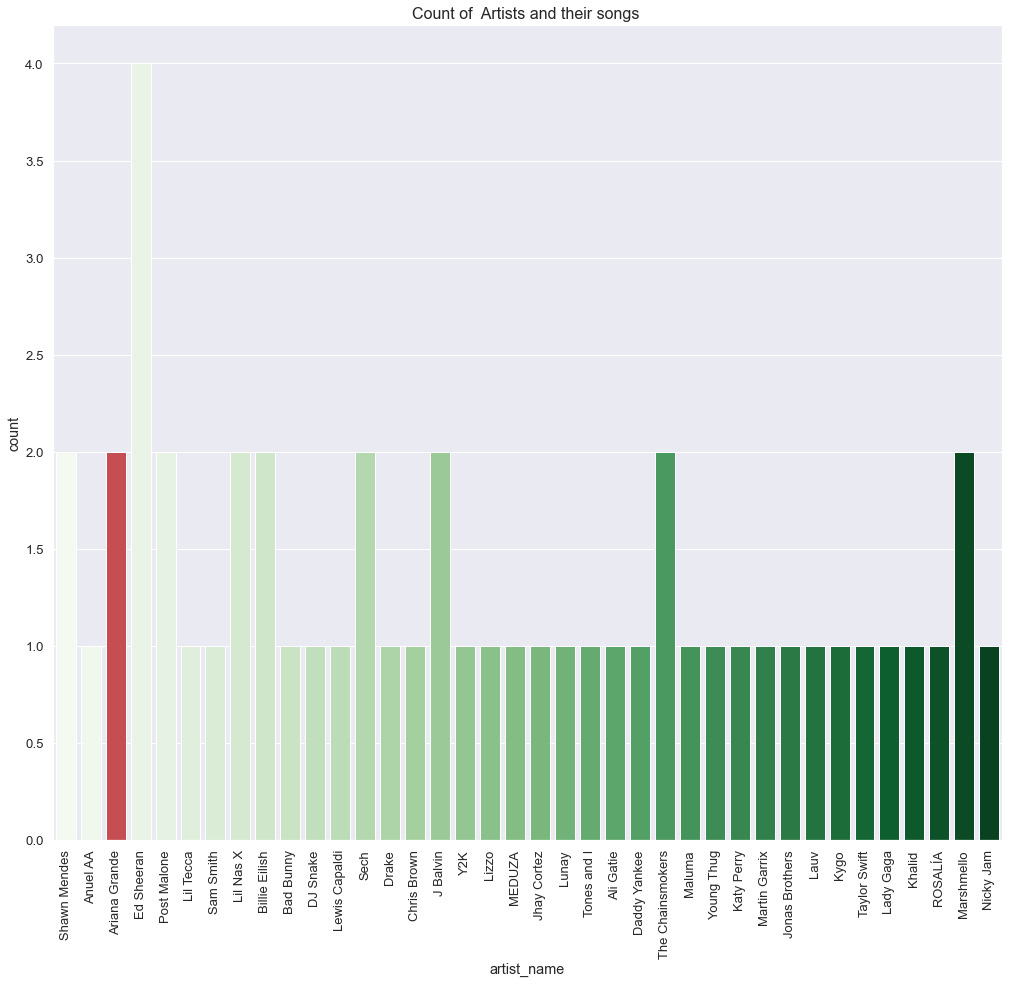

In [50]:
ax = sns.countplot(dataset['artist_name'],palette='Greens')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Count of  Artists and their songs ',fontsize=16)
ax.patches[2].set_fc('r')
plt.show()

In [23]:
#Our Top 10 Artist And Top 10 Genres 
top_10_artist = dataset['artist_name'].value_counts()[:10]
top_10_genres = dataset['Genre'].value_counts()[:10]
top_10_songs = dataset.iloc[dataset['Popularity'].nlargest(10).index,:]
top_10_artist.to_frame()
top_10_songs

track_name    artist_name  \
9                                         bad guy  Billie Eilish   
4                     Goodbyes (Feat. Young Thug)    Post Malone   
10                                       Callaita      Bad Bunny   
1                                           China       Anuel AA   
6                                          Ransom      Lil Tecca   
14       Money In The Grave (Drake ft. Rick Ross)          Drake   
17  Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
19                                    Truth Hurts          Lizzo   
20                            Piece Of Your Heart         MEDUZA   
21                                         Panini      Lil Nas X   

               Genre  beats_per_minute  Energy  Danceability  Loudness(dB)  \
9         electropop               135      43            70           -11   
4            dfw rap               150      65            58            -4   
10         reggaeton               176      62            61            -5   
1     reggaeton flow               105      81            79            -4   
6         trap music               180      64            75            -6   
14  canadian hip hop               101      50            83            -4   
17           dfw rap                90      48            76            -6   
19       escape room               158      62            72            -3   
20         pop house               124      74            68            -7   
21       country rap               154      59            70            -6   

    Liveness  Valence  Length  Acousticness  Speechiness  Popularity  \
9         10       56     194            33           38          95   
4         11       18     175            45            7          94   
10        24       24     251            60           31          93   
1          8       61     302             8            9          92   
6          7       23     131             2           29          92   
14        12       10     205            10            5          92   
17         7       91     158            56            5          91   
19        12       41     173            11           11          91   
20         7       63     153             4            3          91   
21        12       48     115            34            8          91   

     Main.Genre  
9           pop  
4       hip hop  
10       reggae  
1        reggae  
6          trap  
14      hip hop  
17      hip hop  
19  escape room  
20          pop  
21      hip hop

Text(0.5, 0, 'Popularity')

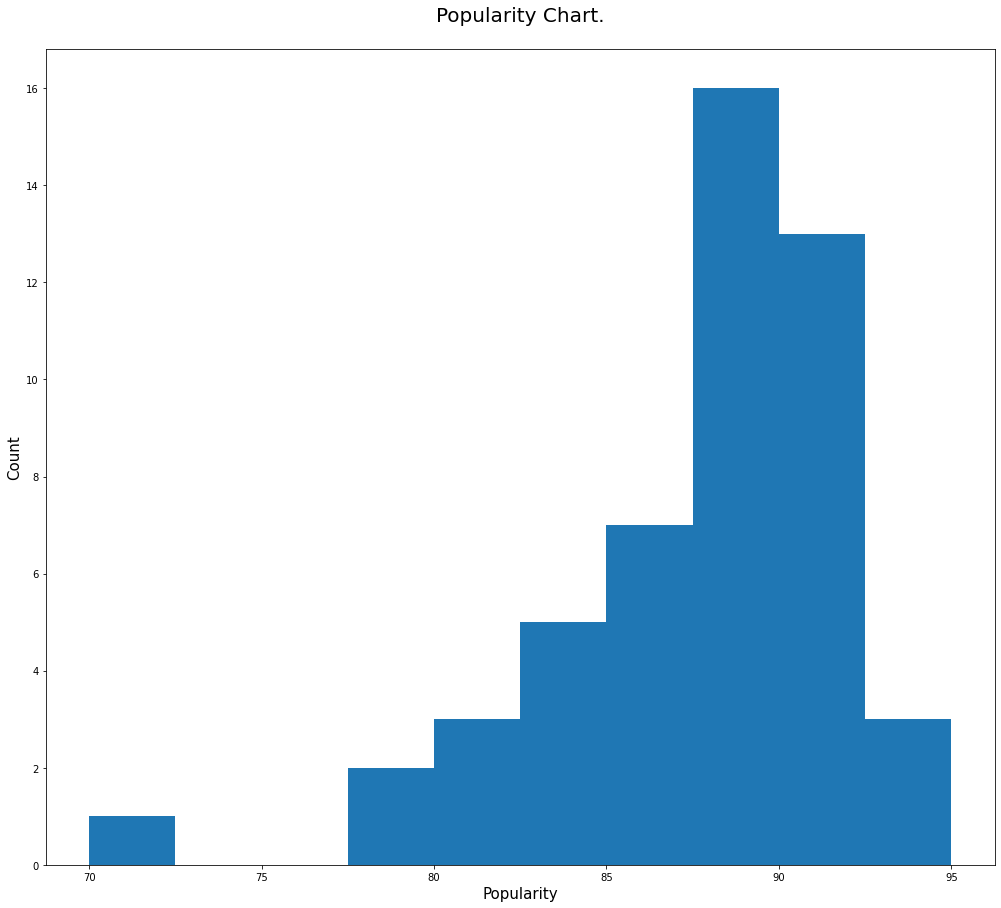

In [24]:
# Plotting a histogram to show the original data distribution 
plt.hist(dataset['Popularity'],bins=10)
plt.title('Popularity Chart.\n',fontsize=20);
plt.ylabel('Count', fontsize=15)
plt.xlabel("Popularity", fontsize=15)

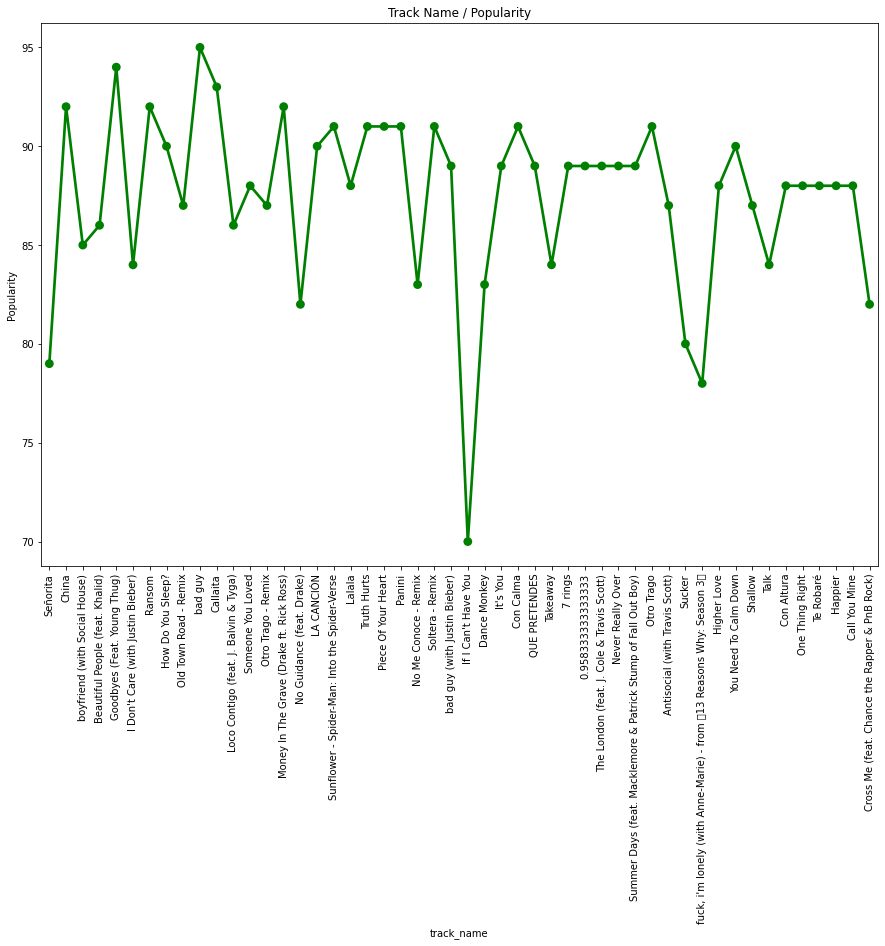

In [25]:
f, ax = plt.subplots(figsize = (15,10))
sns.pointplot(x = dataset.track_name , y = dataset.Popularity, color = "green", alpha = 0.5)
plt.title("Track Name / Popularity")
plt.xticks(rotation = 90)
plt.show()

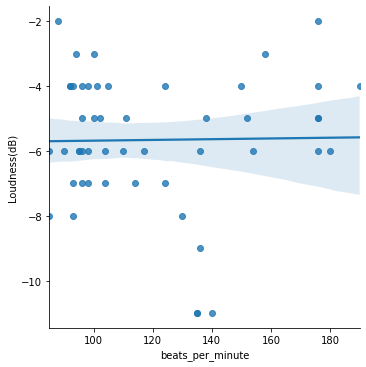

In [26]:
sns.lmplot(x = "beats_per_minute", y = "Loudness(dB)", data = dataset)
plt.show()

Text(18.168967013888896, 0.5, 'Frequency')

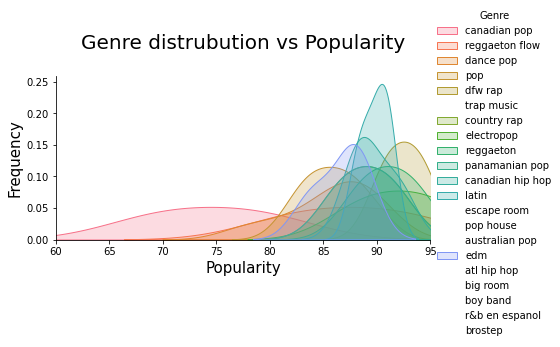

In [27]:
#Analysing Genre Vs Popularity

sns.FacetGrid(dataset, hue="Genre",aspect=2)\
.map(sns.kdeplot,'Popularity',shade= True)\
.set(xlim=(60, dataset['Popularity'].max()))\
.add_legend()

plt.xlabel("Popularity", fontsize=15)
plt.title('Genre distrubution vs Popularity\n', fontsize=20)
plt.ylabel('Frequency', fontsize=15)

In [28]:
#Genre and Number of songs in that Genre.
#Representing using Pie chart
fig = px.pie(dataset, values = 'Popularity', names='Genre', hole = 0.5)
fig.update_layout(annotations=[dict(text='Genre',font_size=20, showarrow=False)])
fig.show()

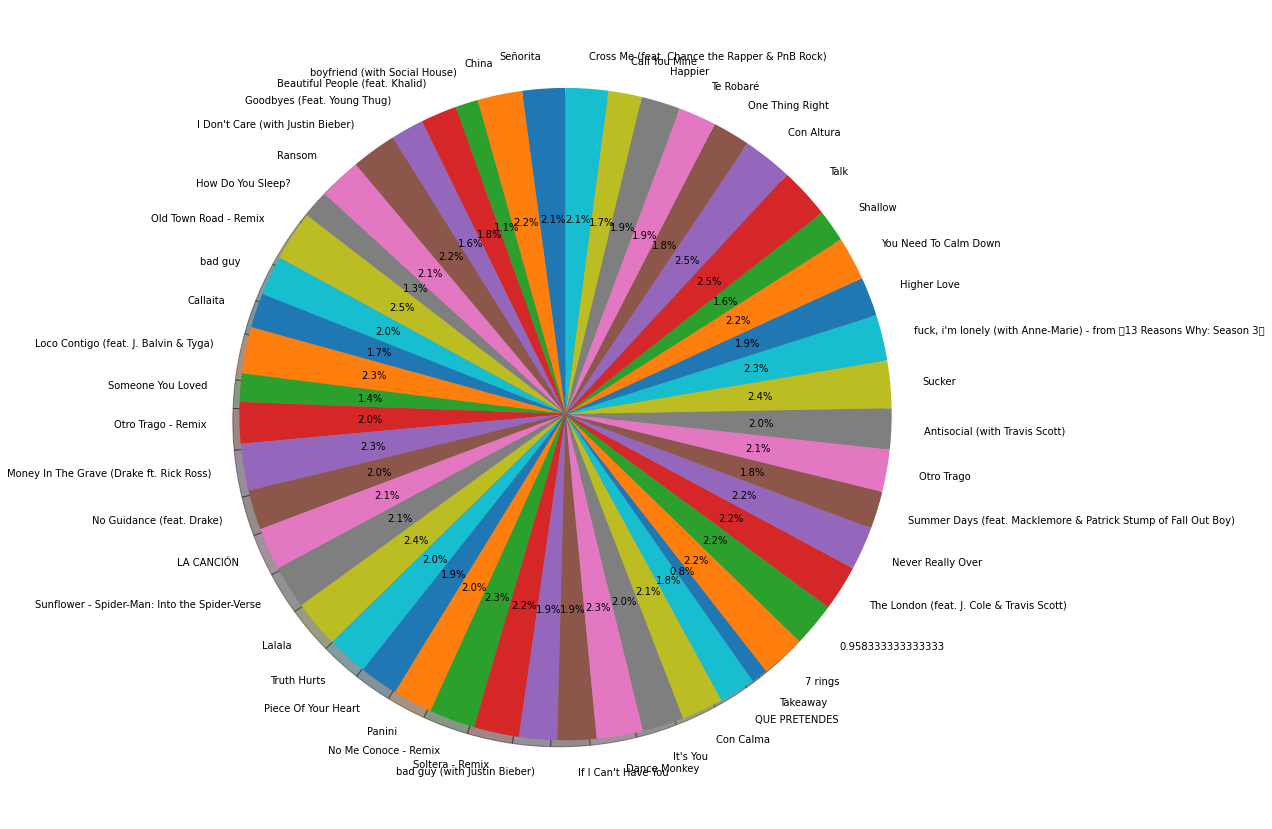

In [29]:
plt.pie(np.array(dataset['Danceability']),labels=np.array(dataset.track_name),radius=1,autopct='%0.1f%%',shadow=True,startangle=90)
plt.show()

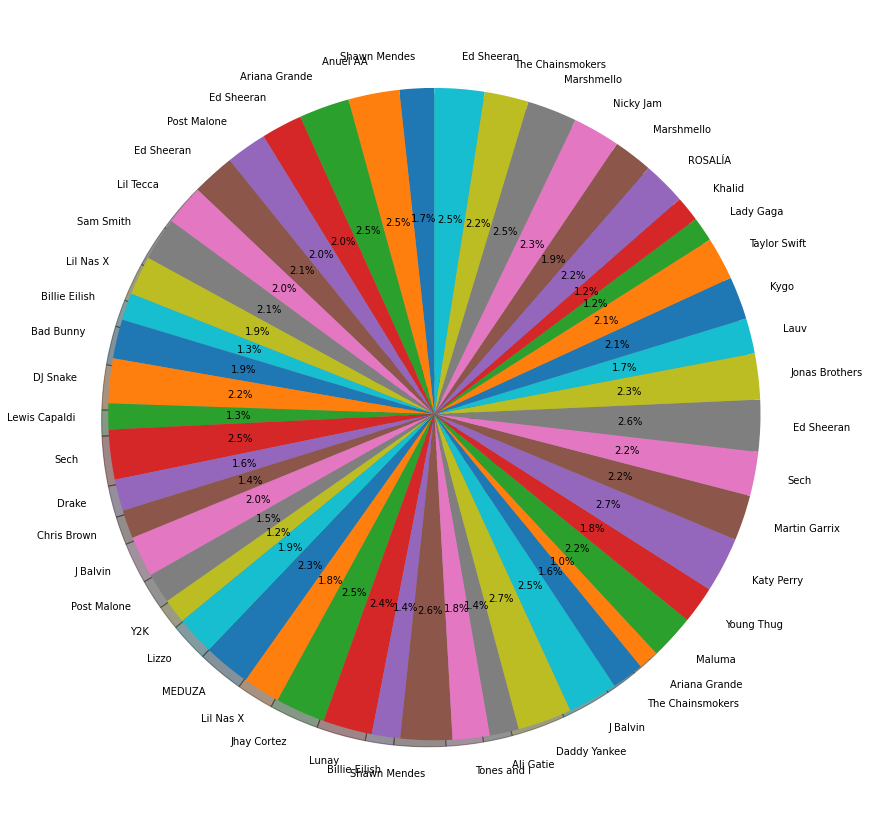

In [30]:
plt.pie(np.array(dataset['Energy']),labels=np.array(dataset.artist_name),radius=1,autopct='%0.1f%%',shadow=True,startangle=90)
plt.show()

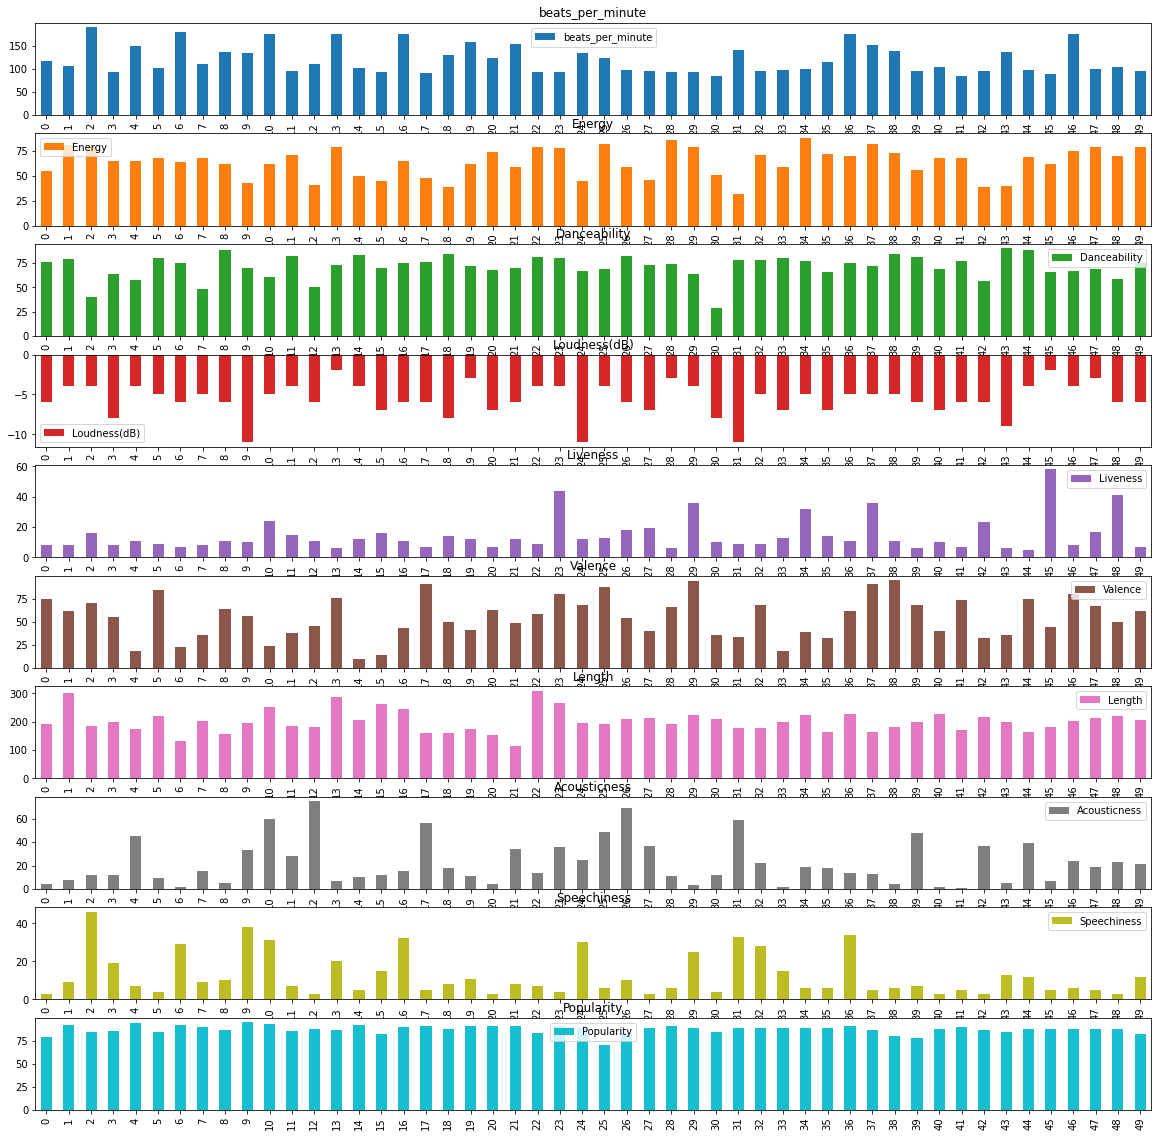

In [31]:
fig=plt.figure(figsize=(20,20))
ax=plt.gca() 
dataset.plot(kind='bar',subplots=True,ax=ax)
plt.show()

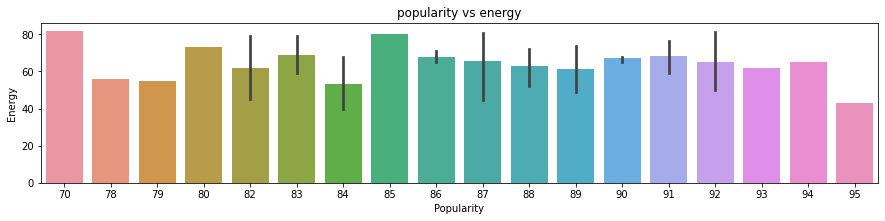

In [32]:
boyut=plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.xlabel('popularity')
plt.ylabel('energy')
plt.title('popularity vs energy')
sns.barplot(data=dataset,y='Energy',x='Popularity')


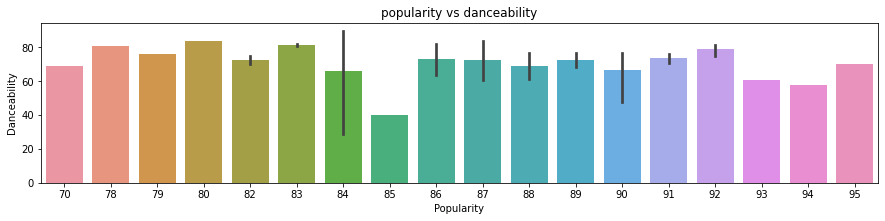

In [33]:
boyut=plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.title('popularity vs danceability')
sns.barplot(data=dataset,y='Danceability',x='Popularity')


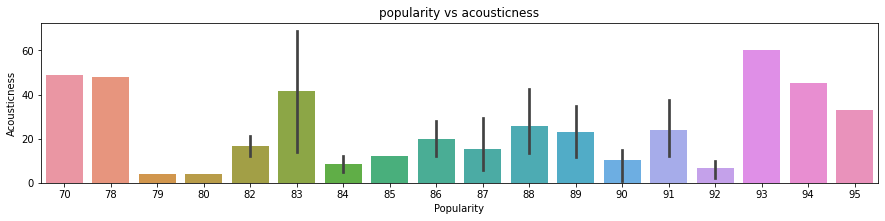

In [34]:
boyut=plt.figure(figsize=(15,10))
plt.subplot(3,1,3)
plt.xlabel('popularity')
plt.ylabel('acoustics')
plt.title('popularity vs acousticness')
sns.barplot(data=dataset,y='Acousticness',x='Popularity')
plt.show()

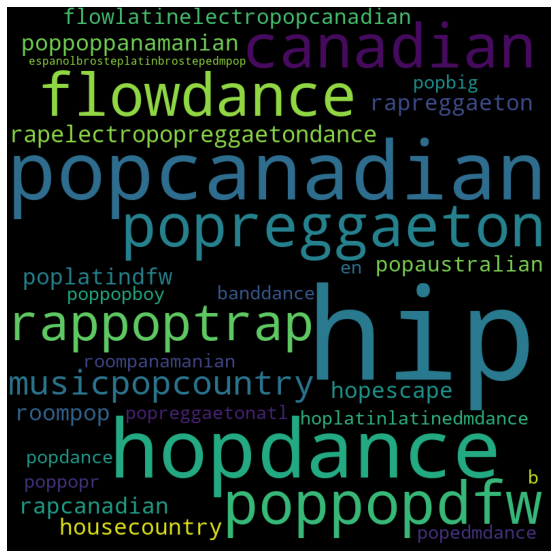

In [35]:
from wordcloud import WordCloud ,STOPWORDS
plt.figure(figsize= (10,10))
words= "".join(dataset["Genre"])
final = WordCloud(width = 800, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()

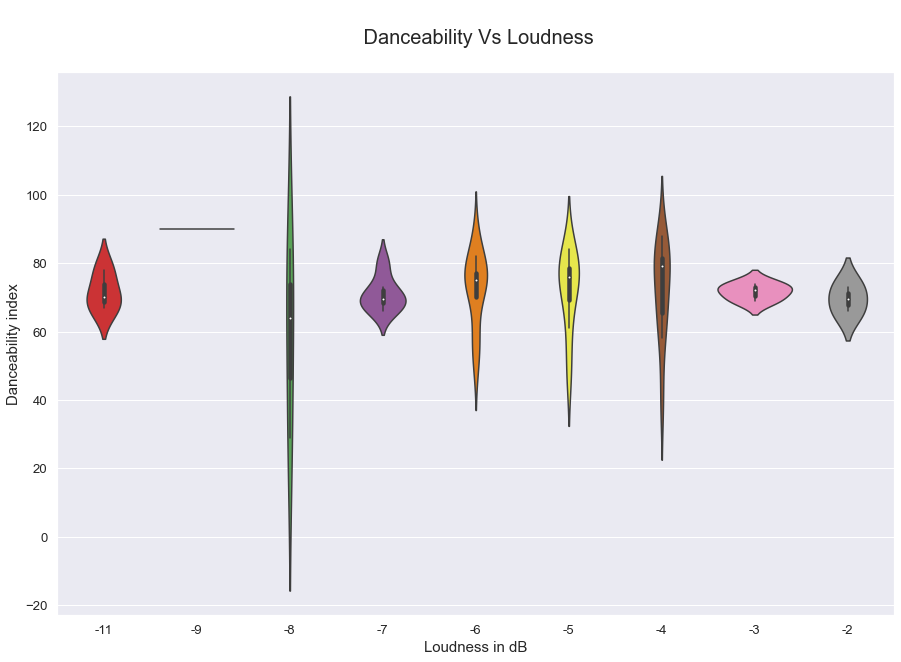

In [36]:
#Corelation between Loudness and Danceability
sns.set(font_scale = 1.2)
plt.figure(figsize=(15,10))
sns.violinplot(x='Loudness(dB)', y='Danceability', data=dataset, palette="Set1")
plt.xlabel('Loudness in dB', fontsize=15)
plt.ylabel('Danceability index', fontsize=15)
plt.title("\n Danceability Vs Loudness\n", fontsize=20);

In [37]:
#Trying to understand if length of the song varies due to Speechiness
fig = px.histogram(dataset,
                   x="Speechiness",
                    y="Length",
                  opacity = 1,
                  title = 'Length of the song Vs Speechiness',
                  color = 'artist_name')
fig.show()

No handles with labels found to put in legend.


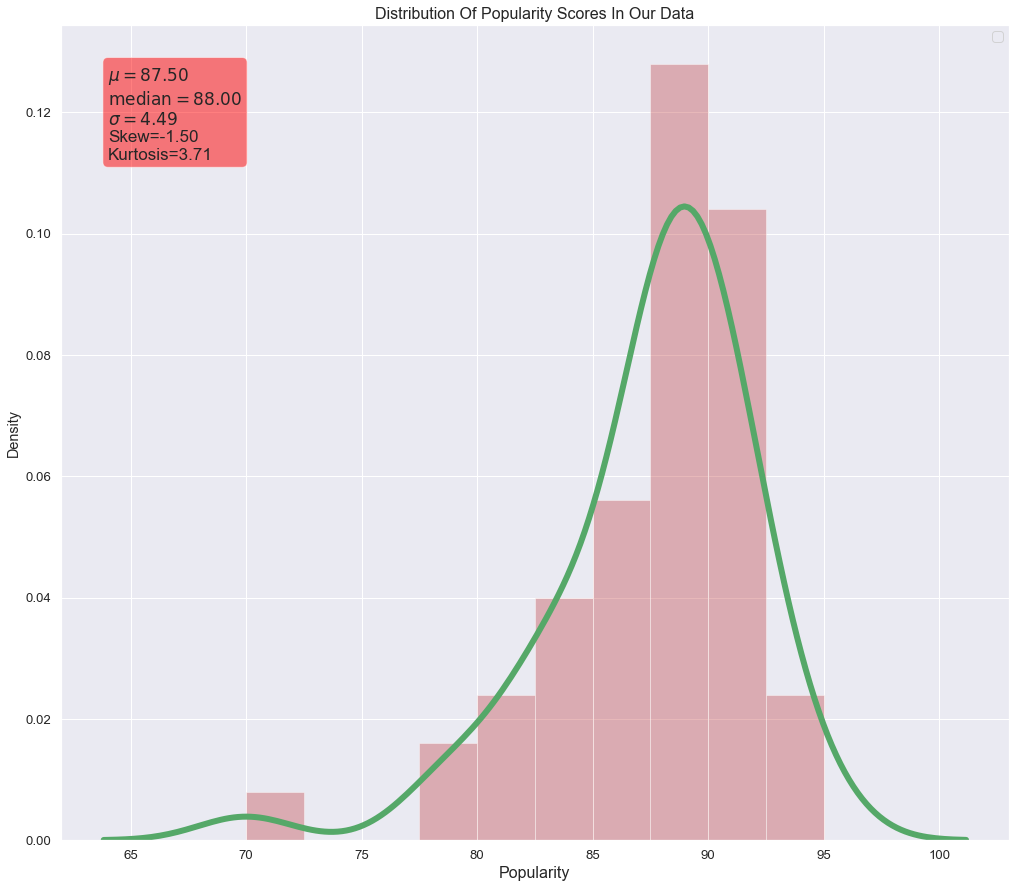

In [38]:
ax = sns.distplot(dataset['Popularity'],hist_kws={'color':'r'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (dataset['Popularity'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (dataset['Popularity'].median(),)
          , r'$\sigma=%.2f$' % (dataset['Popularity'].std(),)
          , r'Skew=%.2f' % (dataset['Popularity'].skew(),)
          , r'Kurtosis=%.2f' % (dataset['Popularity'].kurt(),)

        )
    
                  )

props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution Of Popularity Scores In Our Data',fontsize=16)
ax.set_xlabel('Popularity',fontsize=16)
plt.legend()
plt.show()

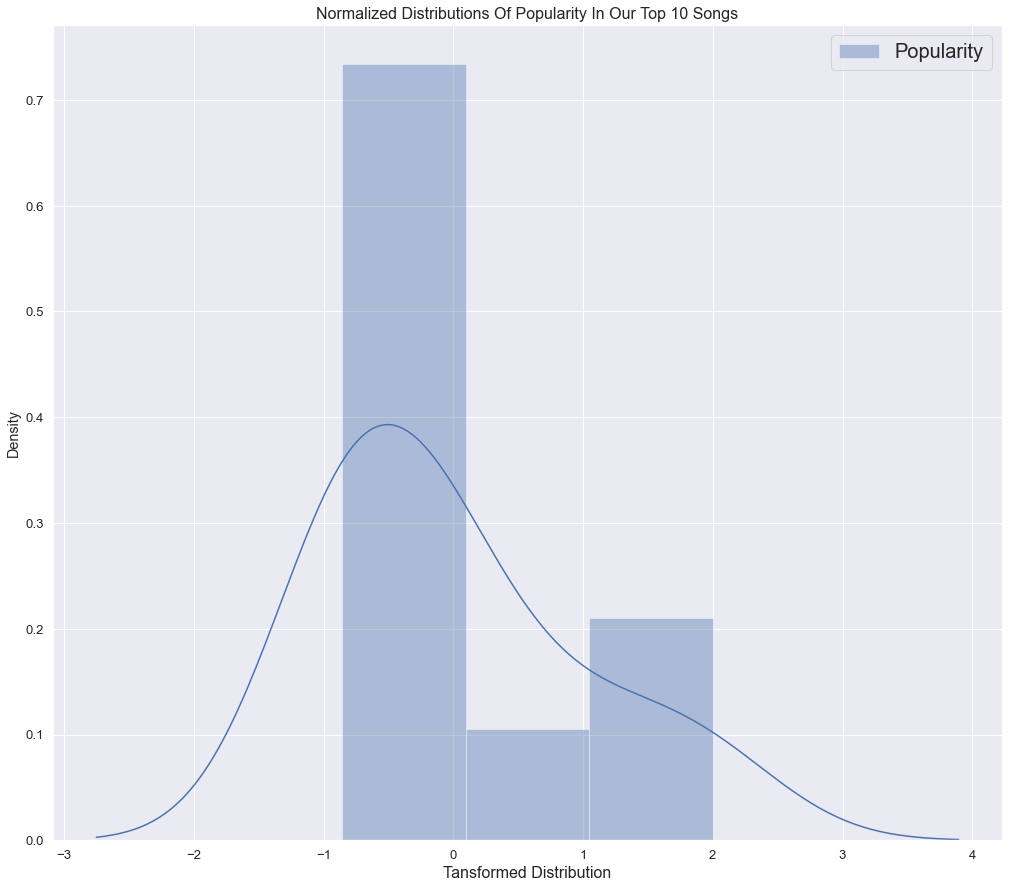

In [39]:
cor = top_10_songs.corr()
ax = sns.distplot((top_10_songs['Popularity']-top_10_songs['Popularity'].mean())/top_10_songs['Popularity'].std(),hist=True,label='Popularity')
ax.set_xlabel('Tansformed Distribution',fontsize=16)
ax.set_title('Normalized Distributions Of Popularity In Our Top 10 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show()

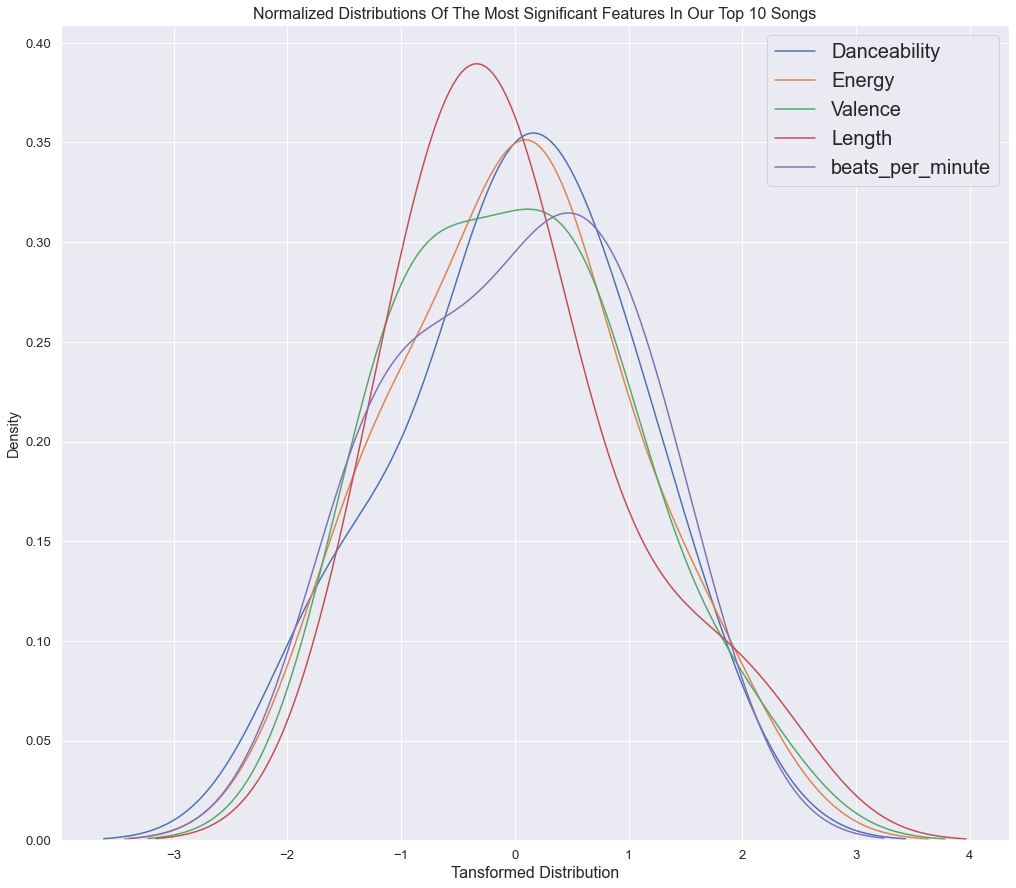

In [40]:
numeric_f = top_10_songs.columns[3:13]
cor = top_10_songs.corr()
ax = sns.distplot((top_10_songs['Danceability']-top_10_songs['Danceability'].mean())/top_10_songs['Danceability'].std(),hist=False,label='Danceability')
ax = sns.distplot((top_10_songs['Energy']-top_10_songs['Energy'].mean())/top_10_songs['Energy'].std(),hist=False,label='Energy')
ax = sns.distplot((top_10_songs['Valence']-top_10_songs['Valence'].mean())/top_10_songs['Valence'].std(),hist=False,label='Valence')
ax = sns.distplot((top_10_songs['Length']-top_10_songs['Length'].mean())/top_10_songs['Length'].std(),hist=False,label='Length')
ax = sns.distplot((top_10_songs['beats_per_minute']-top_10_songs['beats_per_minute'].mean())/top_10_songs['beats_per_minute'].std(),hist=False,label='beats_per_minute')
 
ax.set_xlabel('Tansformed Distribution',fontsize=16)
ax.set_title('Normalized Distributions Of The Most Significant Features In Our Top 10 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show()

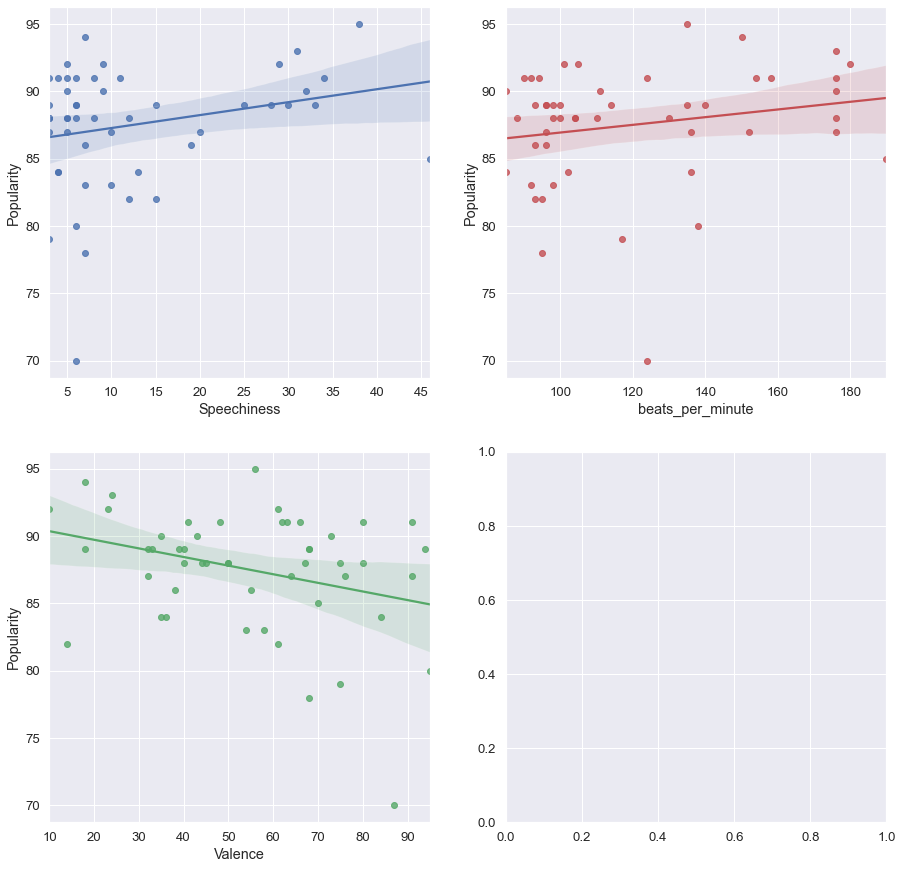

In [41]:
p_correaltion=['Speechiness','beats_per_minute','Valence']
fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(y=dataset['Popularity'],x=dataset[p_correaltion[1]],ax=axs[0,1],color='r')
sns.regplot(y=dataset['Popularity'],x=dataset[p_correaltion[0]],ax=axs[0,0])
sns.regplot(y=dataset['Popularity'],x=dataset[p_correaltion[2]],ax=axs[1,0],color='g')
plt.show()

In [42]:
Y = dataset['Popularity']
X = dataset[['Speechiness','beats_per_minute','Valence']]

In [43]:
fig = px.line(dataset, x= range(0,dataset.shape[0]), y = sorted(Y),
             hover_name = "track_name",hover_data= ['artist_name', 'Genre'])

fig.update_layout(title= 'Popularity sorted', 
                  xaxis =dict(title='Song index'),
                  yaxis =dict(title='Popularity'))
fig.show()

LR min error by CV is: 62.236 
LR min error by CV is: 3.131 
LR mean error by CV is: 19.579


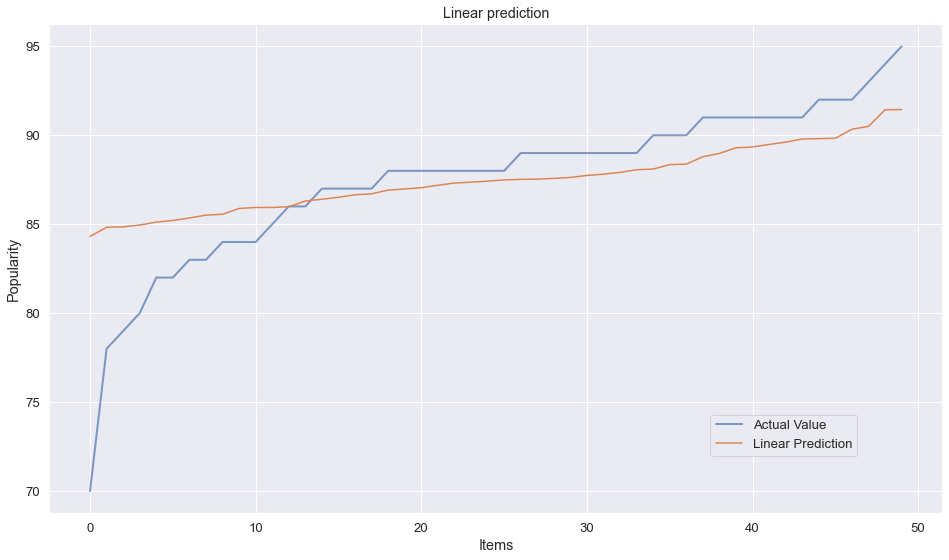

RFR mean squared error is: 16.6645


In [44]:
LR = LinearRegression()

LR_error = -1*cross_val_score(LR,X,Y,cv=10, scoring='neg_mean_squared_error')
LR.fit(X,Y)

print('LR min error by CV is: {:.3f} \nLR min error by CV is: {:.3f} \nLR mean error by CV is: {:.3f}'.
      format(LR_error.max(),LR_error.min(),LR_error.mean()))

fig= plt.figure(figsize=(16,9))

plt.plot(range(0,50),sorted(Y), label='Actual Value',lw=2, alpha= 0.7)
plt.plot(sorted(LR.predict(X)), label='Linear Prediction')

plt.title("Linear prediction")
plt.xlabel("Items")
plt.ylabel("Popularity")
fig.legend(loc='lower right',bbox_to_anchor=(0.75,0.15))
plt.show()

LR_mse = mse(LR.predict(X), Y)
print("RFR mean squared error is: {:.4f}".format(LR_mse))

RFR max error by CV is: 66.688 
RFR min error by CV is: 5.276 
RFR mean error by CV is: 19.320


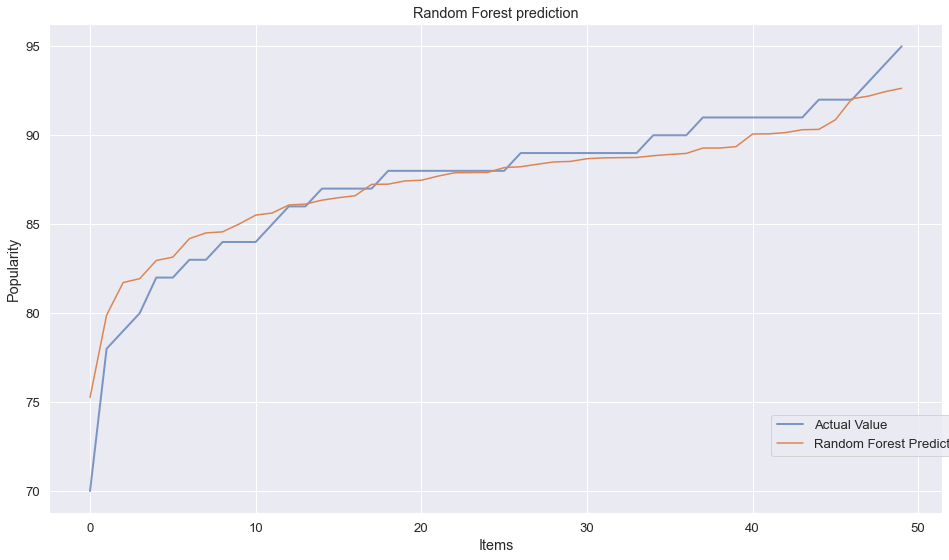

RFR mean squared error is: 2.6320


In [45]:
Y = dataset['Popularity']
X = dataset[['Speechiness','beats_per_minute','Valence']]
RFR = RandomForestRegressor(random_state=42,n_jobs=2)

RFR_error = -1*cross_val_score(RFR,X,Y,cv=10, scoring='neg_mean_squared_error')
RFR.fit(X,Y)

print('RFR max error by CV is: {:.3f} \nRFR min error by CV is: {:.3f} \nRFR mean error by CV is: {:.3f}'.
      format(RFR_error.max(),RFR_error.min(),RFR_error.mean()))

fig= plt.figure(figsize=(16,9))

plt.plot(range(0,50),sorted(Y), label='Actual Value',lw=2, alpha= 0.7)
plt.plot(sorted(RFR.predict(X)), label='Random Forest Prediction')

plt.title("Random Forest prediction")
plt.xlabel("Items")
plt.ylabel("Popularity")
fig.legend(loc='lower right',bbox_to_anchor=(0.85,0.15))
plt.show()

RFR_mse = mse(RFR.predict(X), Y)
print("RFR mean squared error is: {:.4f}".format(RFR_mse))

GBR max error by CV is: 71.727 
GBR min error by CV is: 5.663 
GBR mean error by CV is: 26.174


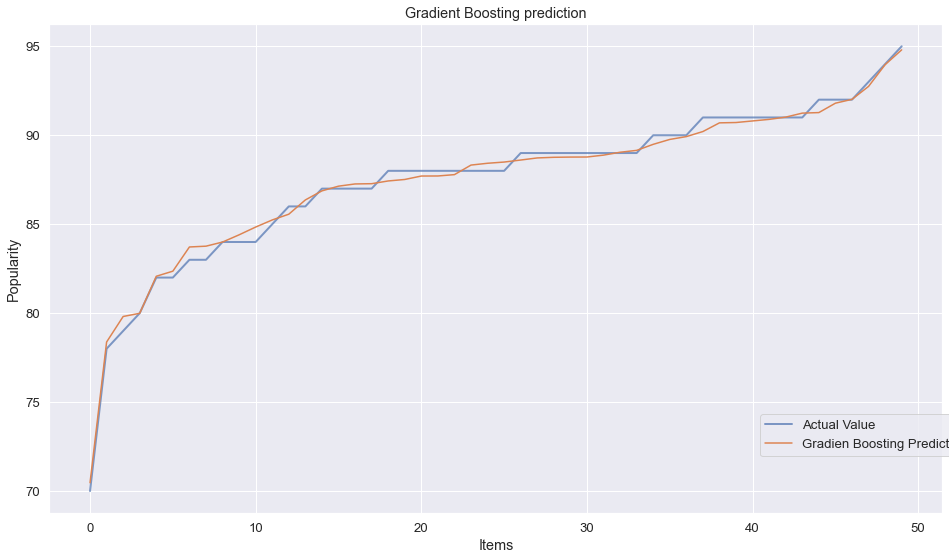

GBR mean squared error is: 0.2032


In [46]:
GBR = GradientBoostingRegressor(random_state=42)

GBR_error = -1*cross_val_score(GBR,X,Y,cv=10, scoring='neg_mean_squared_error')
GBR.fit(X,Y)

print('GBR max error by CV is: {:.3f} \nGBR min error by CV is: {:.3f} \nGBR mean error by CV is: {:.3f}'.
      format(GBR_error.max(),GBR_error.min(),GBR_error.mean()))
fig= plt.figure(figsize=(16,9))

plt.plot(range(0,50),sorted(Y), label='Actual Value',lw=2, alpha= 0.7)
plt.plot(sorted(GBR.predict(X)), label='Gradien Boosting Prediction')

plt.title("Gradient Boosting prediction")
plt.xlabel("Items")
plt.ylabel("Popularity")
fig.legend(loc='lower right',bbox_to_anchor=(0.85,0.15))
plt.show()

GBR_mse = mse(GBR.predict(X), Y)
print("GBR mean squared error is: {:.4f}".format(GBR_mse))

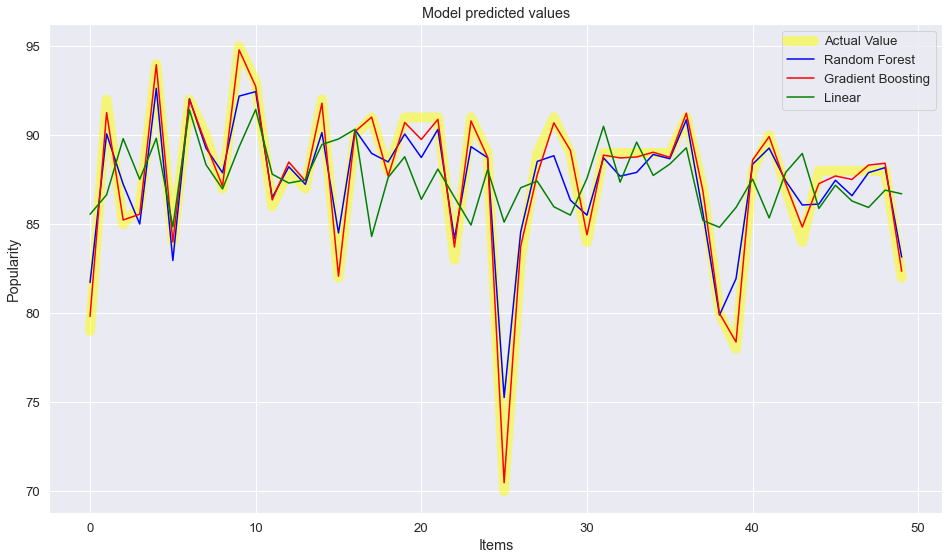

In [47]:
plt.figure(figsize=(16,9))

plt.plot(range(0,50),Y, label='Actual Value',lw=10,alpha= 0.5,color='yellow')
plt.plot(RFR.predict(X), label='Random Forest',color= 'blue')
plt.plot(GBR.predict(X), label='Gradient Boosting',color='red')
plt.plot(LR.predict(X), label='Linear',color='green')

plt.title("Model predicted values")
plt.legend(loc='best')
plt.xlabel("Items")
plt.ylabel("Popularity")
plt.show()

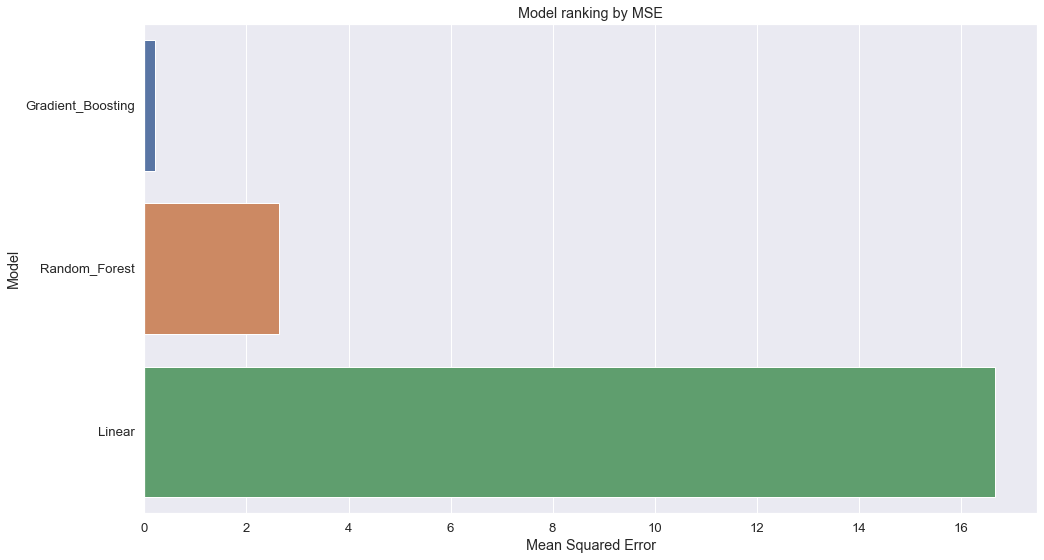

In [48]:
plt.figure(figsize=(16,9))

height=np.array([RFR_mse,GBR_mse,LR_mse])
x_mse = ['Random_Forest', 'Gradient_Boosting','Linear']

dataset_sns = pd.DataFrame({'Model':x_mse,
                      'Mean Squared Error':height})
dataset_sns.sort_values(by=['Mean Squared Error'],inplace=True)
sns.barplot(data=dataset_sns,y='Model',x='Mean Squared Error')

plt.title('Model ranking by MSE')
plt.show()
